## EJECUTA ESTA CELDA PARA AUTENTICARTE CON TU CUENTA DE GMAIL

In [ ]:
!sudo /opt/miniconda/bin/pip install httplib2 apiclient oauth2client==1.5.2 ntplib tzlocal gspread google-api-python-client==1.6.2

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

## Ejercicio 1

implementa una función de kernel polinomial en la que, dadas dos matrices $\mathbf{U} \in \mathbb{R}^{m\times n}$ y $\mathbf{V} \in \mathbb{R}^{l\times n}$, devuelva una matriz $\in \mathbb{R}^{m\times l}$ en la que el elemento $i,j$ venga dado por $(u^{(i)} \cdot v^{(j)}+1)^3$

P.ej.

      U=[[ 1.5  1.5  0. ]
         [ 1.5  1.5  1. ]
         [ 1.   0.   1. ]
         [ 0.   0.5  1. ]
         [ 1.   1.   0.5]]
         
      V=[[ 1.   1.5  0.5]
         [ 1.   2.   2. ]]   
         
      poly_kernel(U,V)
            [[ 107.171875  166.375   ]
             [ 144.703125  421.875   ]
             [  15.625      64.      ]
             [  11.390625   64.      ]
             [  52.734375  125.      ]]

In [14]:
def poly_kernel(U,V):
    degree = 3.
    r = np.zeros((U.shape[0],V.shape[0]))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r[i,j] = np.power((U[i].dot(V[j]) + 1), 3)
        
    return r

import urllib, inspect
src1 = urllib.quote_plus(inspect.getsource(poly_kernel))

comprueba tu código

In [15]:
import numpy as np
U=np.array([[ 1.5,1.5,0.], [ 1.5,1.5,1.], [ 1.,0.,1. ], [ 0.,0.5,1.], [1.,1.,0.5]])
V=np.array([[ 1.,1.5,0.5], [ 1.,2.,2. ]])
poly_kernel(U,V)

array([[107.171875, 166.375   ],
       [144.703125, 421.875   ],
       [ 15.625   ,  64.      ],
       [ 11.390625,  64.      ],
       [ 52.734375, 125.      ]])

#### evaluate your answer before submitting:

In [16]:
!./run CHECK_SOLUTION PS6_1 $src1

evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS6_1 $src1

## Ejercicio 2

implementa una función de kernel polinomial en la que, dadas dos matrices $\mathbf{U} \in \mathbb{R}^{m\times n}$ y $\mathbf{V} \in \mathbb{R}^{l\times n}$, devuelva una matriz $\in \mathbb{R}^{m\times l}$ en la que el elemento $i,j$ venga dado por $2 e^{-2 ||u^{(i)}-v^{(j)}||^2}$ 

P.ej. con las mismas matrices $\mathbf{U}$ y $\mathbf{V}$ del ejercicio anterior, el resultado debería de ser

        [[  7.35758882e-01   2.46819608e-04]
         [  7.35758882e-01   9.95741367e-02]
         [  1.34758940e-02   9.07998595e-05]
         [  2.22179931e-02   4.06936738e-04]
         [  1.21306132e+00   3.00687839e-03]]

In [17]:
def radial_kernel(U,V):
    r = np.zeros((U.shape[0],V.shape[0]))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r[i,j] = 2*np.exp(-2*np.power(np.linalg.norm(U[i]-V[j]),2))
    
    return r

import urllib, inspect
src2 = urllib.quote_plus(inspect.getsource(radial_kernel))

comprueba tu código

In [18]:
U=np.array([[ 1.5,1.5,0.], [ 1.5,1.5,1.], [ 1.,0.,1. ], [ 0.,0.5,1.], [1.,1.,0.5]])
V=np.array([[ 1.,1.5,0.5], [ 1.,2.,2. ]])
print radial_kernel(U,V)

[[7.35758882e-01 2.46819608e-04]
 [7.35758882e-01 9.95741367e-02]
 [1.34758940e-02 9.07998595e-05]
 [2.22179931e-02 4.06936738e-04]
 [1.21306132e+00 3.00687839e-03]]


#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS6_2 $src2

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS6_2 $src2

## Ejercicio 3:

Revisa las notas para entender el algoritmo de kernel regression. Completa la clase `KReg` para que calcule

 $$\mathbf{K}_{\mathbf{I}} = (λ\mathbf{I}_m + K_f(\mathbf{X}, \mathbf{X}))^{−1}$$
 
en el método `fit`, en donde:
- $K_f$ es una función de kernel con la misma espeficicación de las de los ejercicios anteriores y está guardada en `self.Kf`
- $\mathbf{X}$ viene dado por `self.Xtrain`
- $\lambda$ está en `self.lambda`

puedes usar la función [`np.linalg.pinv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html) para obtener la inversa de una matriz, y la función [`np.eye`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) para generar una matriz identidad.

In [19]:
def KReg(**args): # hack for inspect to work with classes
    class KReg_class:
        def __init__ (self, lmbd=0.1, Kf=None):
            self.lmbd = lmbd
            self.Kf    = Kf if Kf is not None else self.dot

        def dot(self,X1,X2):
            return X1.dot(X2.T)

        def fit(self,X,y):
            self.Xtrain = X

            self.KIinv  = np.linalg.pinv(self.lmbd * np.eye(X.shape[0]) + self.Kf(X, X))
            
    return KReg_class(**args)           

import urllib, inspect
src3 = urllib.quote_plus(inspect.getsource(KReg))

Comprueba tu código. Ha de dar 2.46 aprox.

In [20]:
X,y = (np.array([[5, 0],[3, 5],[5, 5],[7, 0],[7, 5]]), 
       np.array([9, 5, 2, 8, 2]))

kr = KReg()
kr.fit(X,y)
np.sum(kr.KIinv)

2.463305152424846

#### evaluate your answer before submitting:

In [21]:
!./run CHECK_SOLUTION PS6_3 $src3

evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS6_3 $src3

## Ejercicio 4

Implementa la función `predict` de la clase siguiente para un conjunto de nuevo de datos siguiendo el API de `sklearn`:

$$\hat{\mathbf{y}} = \mathbf{y}_{tr}^T\mathbf{K}_{\mathbf{I}}K_f(\mathbf{X}_{tr}, \mathbf{X})$$

donde:

- $\mathbf{y}_{tr}$ está en `self.ytrain`
- $\mathbf{X}_{tr}$ está en `self.Xtrain`
- $\mathbf{K}_{\mathbf{I}}$ está en `self.KIinv`
- $K_f$ está en `self.Kf`

pon atención a que el resultado ha de ser un vector de $m$ elementos (no una matriz, aunque sea de una sola columna o fila).

In [22]:
def KReg(**args): # hack for inspect to work with classes
    class KReg_class:
        def __init__ (self, lmbd=0.1, Kf=None):
            self.lmbd = lmbd
            self.Kf    = Kf if Kf is not None else self.dot

        def dot(self,X1,X2):
            return X1.dot(X2.T)

        def fit(self,X,y):
            self.Xtrain = X
            self.ytrain = y

            self.KIinv  = np.linalg.pinv(self.lmbd * np.eye(X.shape[0]) + self.Kf(X, X))

        def predict(self,X):
            yhat = self.ytrain.T.dot(self.KIinv).dot(self.Kf(self.Xtrain, X)).flatten()
            return yhat
    return KReg_class(**args)           
        
import urllib, inspect
src4 = urllib.quote_plus(inspect.getsource(KReg))


Comprueba tu código. La ejecución de la siguiente celda con la función de kernel radial que hiciste en los ejercicios anteriores debería de darte algo así:

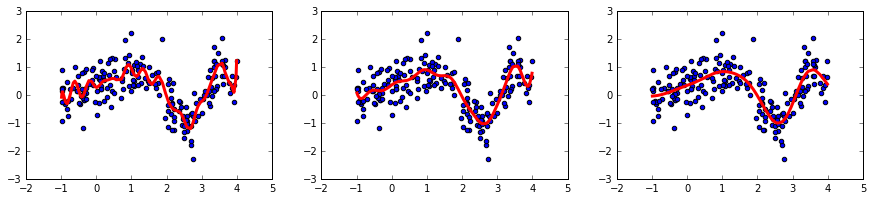

In [20]:
from IPython.display import Image
Image(filename='imgs/kreg.png')

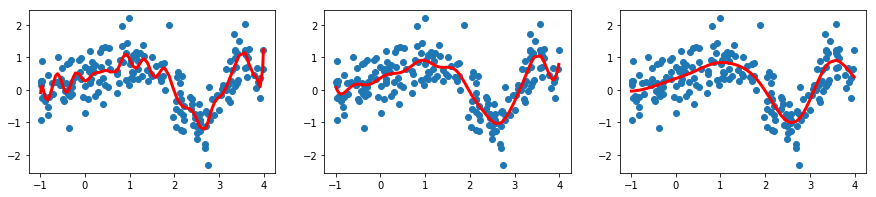

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d    = np.loadtxt("data/regdata.csv")
X, y = d[:,0].reshape(-1,1), d[:,1]

def plot_regressor_prediction_in_1D(X, regressor, color="r", linewidth=3):
    i = np.argsort(X[:,0])
    plt.plot (X[i,:], rr.predict(X[i,:]), color="r", linewidth=3)


plt.figure(figsize=(15,3))
for i,l in enumerate([0,.001,1]):
    plt.subplot(1,3,i+1)
    rr = KReg(lmbd=l, Kf=radial_kernel)
    rr.fit(X,y)
    plt.scatter(X,y)
    plot_regressor_prediction_in_1D(X,rr)
    

#### evaluate your answer before submitting:

In [25]:
!./run CHECK_SOLUTION PS6_4 $src4

fixed grader
checking lambda = 0
checking lambda = 0.001
checking lambda = 1
evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS6_4 $src4